## SQL ALCHEMY HOMEWORK

    Step 1 - Climate Analysis and Exploration

    To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


    Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.

    Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

    Use SQLAlchemy create_engine to connect to your sqlite database.

    Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Use this library to find a date relative to another date
# Reference from Sivakumar Venkatachalam in my tutors repository
from dateutil.relativedelta import relativedelta 

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [3]:
engine = create_engine("sqlite:///./hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])
            

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# 1) Perform a query to retrieve the data and precipitation scores
# 2) Save the query results as a Pandas DataFrame 
# 3) Make necessary conversions of objects to numbers
# 4) Use Pandas to clean up the data
# 5 ) Filter by the desired / requested timeframe
#     Determine 1 year prior to the last date in the sqlite file 

# Step 1 - Perform a query to retrieve the measurements and precipitation scores
yearly_precip = session.query(Measurement.prcp, Measurement.date).all()

# #2 Save the query as a Pandas dataframe for further cleanup  
# Note:  The query results in tuples;  Pandas can receive the tuples easily

all_df = pd.DataFrame(yearly_precip, columns=['Precipitation', 'Date'])

# Check out the data
all_df.dtypes


Precipitation    float64
Date              object
dtype: object

In [27]:
# 4) Use Pandas to clean up the data:  Remove the NaNs
# Sort by date - note that we have the data from all stations in Hawaii


all_df = all_df.dropna(how="any")
all_df = all_df.sort_values('Date')
all_df.head()


,Precipitation,Date
0,0.08,2010-01-01
9518,0.15,2010-01-01
2724,0.28,2010-01-01
14959,0.05,2010-01-01
16938,0.14,2010-01-01


In [28]:
all_df.dtypes


Precipitation           float64
Date             datetime64[ns]
dtype: object

In [29]:
calc_df = all_df

calc_df.head()

,Precipitation,Date
0,0.08,2010-01-01
9518,0.15,2010-01-01
2724,0.28,2010-01-01
14959,0.05,2010-01-01
16938,0.14,2010-01-01


In [30]:
# 3) Make necessary conversions of objects to numbers
# The date is an object -- which means we cannot plot in matplotlib
# Convert Date to a DateTime

calc_df['Date'] = pd.to_datetime(calc_df['Date'], errors='coerce', format='%Y-%m-%d', )
#calc_df['Date'] = pd.to_datetime(calc_df['Date'].str.strip(), errors='coerce', format='%Y-%m-%d', )

In [31]:
calc_df.head()

,Precipitation,Date
0,0.08,2010-01-01
9518,0.15,2010-01-01
2724,0.28,2010-01-01
14959,0.05,2010-01-01
16938,0.14,2010-01-01


In [32]:
calc_df.dtypes

Precipitation           float64
Date             datetime64[ns]
dtype: object

In [34]:
# 5) Filter to the requested timeframe for plotting

# 5a)Find the date of the  last data point in the database

lastdate = calc_df["Date"].iloc[-1]
lastdate

Timestamp('2017-08-23 00:00:00')

In [19]:
# 5) Determine 1 year prior to the last date in the sqlite file 
# 5b) use the relativedelta function that was imported
firstdate = lastdate - relativedelta(years=1)
firstdate

Timestamp('2016-08-23 00:00:00')

In [35]:
# #5 Filter the data to the desired date range
oneyr_df = all_df.loc[all_df['Date'] >= firstdate]

In [36]:
# Check the data
oneyr_df.head()

,Precipitation,Date
5090,0.15,2016-08-23
2363,0.00,2016-08-23
14607,1.79,2016-08-23
7330,0.05,2016-08-23
11850,0.02,2016-08-23


In [37]:
oneyr_data = oneyr_df.set_index('Date')
oneyr_data_flask = oneyr_data.to_dict()
oneyr_data_flask

{'Precipitation': {Timestamp('2016-08-23 00:00:00'): 0.7,
  Timestamp('2016-08-24 00:00:00'): 1.22,
  Timestamp('2016-08-25 00:00:00'): 0.11,
  Timestamp('2016-08-26 00:00:00'): 0.01,
  Timestamp('2016-08-27 00:00:00'): 0.02,
  Timestamp('2016-08-28 00:00:00'): 0.14,
  Timestamp('2016-08-29 00:00:00'): 0.0,
  Timestamp('2016-08-30 00:00:00'): 0.0,
  Timestamp('2016-08-31 00:00:00'): 0.25,
  Timestamp('2016-09-01 00:00:00'): 0.0,
  Timestamp('2016-09-02 00:00:00'): 0.01,
  Timestamp('2016-09-03 00:00:00'): 0.12,
  Timestamp('2016-09-04 00:00:00'): 0.03,
  Timestamp('2016-09-05 00:00:00'): 0.02,
  Timestamp('2016-09-06 00:00:00'): 0.11,
  Timestamp('2016-09-07 00:00:00'): 0.05,
  Timestamp('2016-09-08 00:00:00'): 0.22,
  Timestamp('2016-09-09 00:00:00'): 0.01,
  Timestamp('2016-09-10 00:00:00'): 0.14,
  Timestamp('2016-09-11 00:00:00'): 0.3,
  Timestamp('2016-09-12 00:00:00'): 1.04,
  Timestamp('2016-09-13 00:00:00'): 0.02,
  Timestamp('2016-09-14 00:00:00'): 1.19,
  Timestamp('2016-09-1

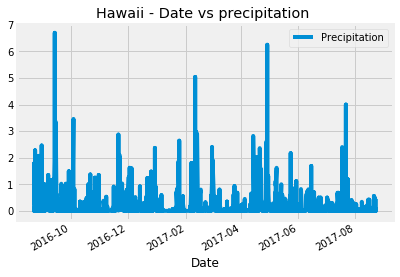

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data

oneyr_df.plot(x="Date",y="Precipitation",kind="line",ax=None,legend=True,
                     title="Hawaii - Date vs precipitation ")

plt.tight_layout
plt.show()

![precipitation](Images/precipitation.png)


In [39]:
# Create a dictionary from the precipitation data, in order to make an API with Flask
precip_data = oneyr_df.set_index('Date')
precip_data

,Precipitation
Date,
2016-08-23,0.15
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data

oneyr_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](./describe.png)

## Station Analysis


Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order.
Which station has the highest number of observations?
Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [41]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [42]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Measurement.station).distinct().count()
print(station_count)

9


In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Note - in order to use descending order you have to import the desc function from 
# sqlalchemy  i.e.
# from sqlalchemy import desc  which was added to the other imports above
# Ref Stack overflow 
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
# Method of labelling the counts from Sivakumar Venkatachalam in the Tutors repository

station_info = session.query(Measurement.station, func.count(Measurement.station).label("Station ct")).\
               group_by(Measurement.station).\
               order_by(desc("Station ct")).\
               all()
station_info

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Ref:  Sivakumar Venkatachalam  from tutor repository
# store the station name with the most activity from the dictionary
# So that it can be used for filtering

(active_station, count) = station_info[0]
active_station

'USC00519281'

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

Active_station_info = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                      filter(Measurement.station == active_station).\
                      all()

Active_station_info

[(54.0, 85.0, 71.66378066378067)]

In [48]:
end_date="2017-08-23"
print(type(end_date))
e_date = dt.datetime.strptime(end_date, '%Y-%m-%d')
first_date=e_date - relativedelta(years=1)
print(first_date)

<class 'str'>
2016-08-23 00:00:00


In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram

# Since this needs Matplotlib,  we are going to put everything into a Pandas
# Dataframe in order to manipulate and plot further,  rather than use SQL


Active_station_temp = session.query(Measurement.date, Measurement.tobs).\
                      filter(Measurement.station == active_station).\
                      all()

station_temp = pd.DataFrame(Active_station_temp, columns=['Date', 'Temp (F)'])
station_temp.dtypes, station_temp.head()


(Date         object
 Temp (F)    float64
 dtype: object,          Date  Temp (F)
 0  2010-01-01      70.0
 1  2010-01-02      62.0
 2  2010-01-03      74.0
 3  2010-01-04      75.0
 4  2010-01-05      74.0)

In [50]:
# As in the prior activity, change date to date-time,
# filter data to only the last year
# Setup bins

station_temp['Date'] = pd.to_datetime(station_temp['Date'].str.strip(), errors='coerce', format='%Y-%m-%d', )


#lastyr_temp = station_temp.loc[station_temp['Date (F)'] >= firstdate]
#oneyr_df = all_df.loc[all_df['Date (F)'] >= firstdate]
station_temp.dtypes

Date        datetime64[ns]
Temp (F)           float64
dtype: object

In [51]:
#station_temp.head()

In [52]:
# Filter to the last year of data

lastyr_temp = station_temp.loc[station_temp['Date'] >= firstdate]
lastyr_temp.dtypes

Date        datetime64[ns]
Temp (F)           float64
dtype: object

In [54]:
lastyr_temp.head()

,Date,Temp (F)
2420,2016-08-23,77.0
2421,2016-08-24,77.0
2422,2016-08-25,80.0
2423,2016-08-26,80.0
2424,2016-08-27,75.0


In [55]:
#Look at min and max temp data to see how to fit 12 bins to the data
max_temp =  lastyr_temp['Temp (F)'].max()
min_temp = lastyr_temp['Temp (F)'].min()
min_temp, max_temp

(59.0, 83.0)

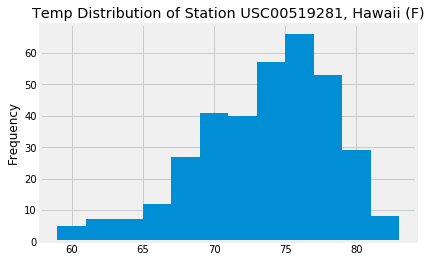

In [56]:
# Extract just the temperature for the histogram

Station_temp = lastyr_temp['Temp (F)']
Station_temp.plot.hist(by='Temp (F)', bins=12, title='Temp Distribution of Station USC00519281, Hawaii (F)')

##Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
Use FLASK to create your routes.

Routes /api/v1.0/precipitation

Convert the query results to a Dictionary using date as the key and prcp as the value. Return the JSON representation of your dictionary.

/api/v1.0/stations Return a JSON list of stations from the dataset.

/api/v1.0/tobs query for the dates and temperature observations from a year from the last data point. Return a JSON list of Temperature Observations (tobs) for the previous year.

/api/v1.0/ and /api/v1.0// Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range. When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date. When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

Hints

You will need to join the station and measurement tables for some of the analysis queries.

Use Flask jsonify to convert your API data into a valid JSON response object.

Use the Juypter notebook below to debug tasks

In [78]:
# Task 3 - Return JSON of observed temepraetures
# Setup filtering of the data base by date

end_date_str = "2017-08-23"
end_date = dt.datetime.strptime(end_date_str, "%Y-%m-%d")
start_date = end_date - relativedelta(years=1)
end_date, start_date


(datetime.datetime(2017, 8, 23, 0, 0), datetime.datetime(2016, 8, 23, 0, 0))

In [81]:
# Query the database for temperature observations, filtering on the last date
station_temp = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= start_date).all()
    

In [82]:
temp_df = pd.DataFrame(station_temp, columns=['Date', 'Temp'])
temp_df.head()

,Date,Temp
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0


In [86]:
temp_df = temp_df.dropna(how="any")
temp_df = temp_df.sort_values('Date')
temp_date = temp_df.set_index('Date')
temp_date.tail()

,Temp
Date,
2017-08-22,82.0
2017-08-23,82.0
2017-08-23,81.0
2017-08-23,82.0
2017-08-23,76.0


In [94]:
temp_data.dtypes

Temp    float64
dtype: object

In [95]:
temp_data_flask = temp_data.to_dict()
temp_data_flask

{'Temp': {'2016-08-24': 79.0,
  '2016-08-25': 77.0,
  '2016-08-26': 84.0,
  '2016-08-27': 81.0,
  '2016-08-28': 71.0,
  '2016-08-29': 78.0,
  '2016-08-30': 79.0,
  '2016-08-31': 78.0,
  '2016-09-01': 82.0,
  '2016-09-02': 81.0,
  '2016-09-03': 78.0,
  '2016-09-04': 75.0,
  '2016-09-05': 82.0,
  '2016-09-06': 73.0,
  '2016-09-07': 76.0,
  '2016-09-08': 81.0,
  '2016-09-09': 77.0,
  '2016-09-10': 78.0,
  '2016-09-11': 76.0,
  '2016-09-12': 76.0,
  '2016-09-13': 79.0,
  '2016-09-14': 76.0,
  '2016-09-15': 73.0,
  '2016-09-16': 79.0,
  '2016-09-17': 76.0,
  '2016-09-18': 78.0,
  '2016-09-19': 70.0,
  '2016-09-20': 76.0,
  '2016-09-21': 76.0,
  '2016-09-22': 79.0,
  '2016-09-23': 76.0,
  '2016-09-24': 83.0,
  '2016-09-25': 82.0,
  '2016-09-26': 77.0,
  '2016-09-27': 80.0,
  '2016-09-28': 77.0,
  '2016-09-29': 79.0,
  '2016-09-30': 80.0,
  '2016-10-01': 79.0,
  '2016-10-02': 80.0,
  '2016-10-03': 79.0,
  '2016-10-04': 78.0,
  '2016-10-05': 77.0,
  '2016-10-06': 80.0,
  '2016-10-07': 73.0,
  

In [101]:
#Task 4  Return Min, Avg and Max Temp between start and end dates

#def temp_query(start, end):

start_input = '2016-08-23'
end_input = '2017-08-23'

try:
    start_date =  dt.datetime.strptime(start_input, '%Y-%m-%d')

except:
    print(" Invalid start date or date format. Please input valid date in yyyy-mm-dd format.")
    print(" Using default date. start = 2017-08-23")
    print(" ")
    start_input   = '2017-08-23'
    start_date  = dt.datetime.strptime(start_input, '%Y-%m-%d')

try:
    end_date =  dt.datetime.strptime(end_input, '%Y-%m-%d')

except:
    print(" Invalid end date or date format. Please input valid date in yyyy-mm-dd format.")
    print(" Using default date. start = 2017-08-23")
    print(" ")
    end_input   = '2017-08-23'
    end_date  = dt.datetime.strptime(end_input, '%Y-%m-%d')


    


In [107]:
specific_temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        all()
                                     
specific_temp


  

[(58.0, 74.57894736842105, 87.0)]

![precipitation](Images/station-histogram.png)

## Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.


Use FLASK to create your routes.

Routes
/api/v1.0/precipitation

Convert the query results to a Dictionary using date as the key and prcp as the value.
Return the JSON representation of your dictionary.

/api/v1.0/stations
Return a JSON list of stations from the dataset.

/api/v1.0/tobs
query for the dates and temperature observations from a year from the last data point.
Return a JSON list of Temperature Observations (tobs) for the previous year.



/api/v1.0/<start> and /api/v1.0/<start>/<end>
Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

Hints


You will need to join the station and measurement tables for some of the analysis queries.

Use Flask jsonify to convert your API data into a valid JSON response object.